# Monte Carlo 1D Random Walk

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
num_episodes = 120
alphas = [0.01, 0.02, 0.03, 0.04, 0.05] 
init_val = 0.5

# States and rewards
up_state = -3  
reward_up = 0.0  
down_state = 3 
reward_down = 1.0  

init_state = 0 
val_histories = []

for alpha in alphas:
    estimated_val = init_val
    val_history = np.zeros(num_episodes)

    for episode in range(num_episodes):
        # Start a new episode
        current_state = init_state
        episode_over = False

        while not episode_over:
            # Perform a random walk
            coinflip = np.random.choice([-1, 1])  # Choose direction randomly
            current_state += coinflip

            if current_state == up_state:
                episode_reward = reward_up
                episode_over = True

            if current_state == down_state:
                episode_reward = reward_down
                episode_over = True
        
        estimated_val += alpha * (episode_reward - estimated_val) # V(s)←V(s)+α(G−V(s)) Monte Carlo target
        val_history[episode] = estimated_val 

    val_histories.append((alpha, val_history))


In [51]:
for alpha, val_history in val_histories:
    print(f"Final value for alpha = {alpha}: {val_history[-1]}")

Final value for alpha = 0.01: 0.4580557771206617
Final value for alpha = 0.02: 0.5066197902509914
Final value for alpha = 0.03: 0.36441228228651945
Final value for alpha = 0.04: 0.42023358508818714
Final value for alpha = 0.05: 0.5266553424823541


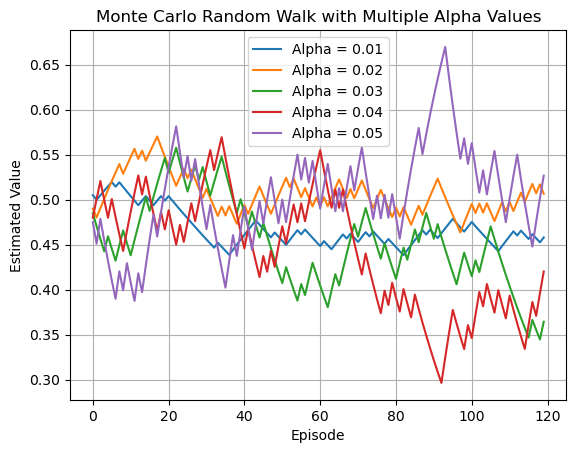

In [52]:
for alpha, history in val_histories:
    plt.plot(history, label=f'Alpha = {alpha}')
    
plt.xlabel('Episode')
plt.ylabel('Estimated Value')
plt.title('Monte Carlo Random Walk with Multiple Alpha Values')
plt.legend()
plt.grid()
plt.show()